# Óbitos por data do óbito. 

Esse script replica gráficos de duas fontes:

* Reportes de óbitos nos boletins semanais do MS <br>
https://twitter.com/canalpeixebabel/status/1262387751787339780?s=20
* Plot animado de reportes diários <br>
https://twitter.com/obscovid19br/status/1262166415160807424?s=20
 

In [2]:
!wget https://raw.githubusercontent.com/covid19br/covid19br.github.io/master/SRAGs-tabela-last-updated_revised2.csv

--2020-05-19 22:16:37--  https://raw.githubusercontent.com/covid19br/covid19br.github.io/master/SRAGs-tabela-last-updated_revised2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3920 (3.8K) [text/plain]
Saving to: ‘SRAGs-tabela-last-updated_revised2.csv’

SRAGs-tabela-last-u 100%[===================>]   3.83K  --.-KB/s    in 0s      

2020-05-19 22:16:38 (53.9 MB/s) - ‘SRAGs-tabela-last-updated_revised2.csv’ saved [3920/3920]



In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
obitos_df = pd.read_csv('SRAGs-tabela-last-updated_revised2.csv')
datas = obitos_df['Data']
datas = ['/'.join(d.split('/')[::-1]) for d in datas]
obitos_df['Data'] = np.asarray(datas)
obitos_df.drop(0, inplace=True)
display(obitos_df)

,Data,08/05/20,07/05/20,03/05/20,02/05/20,29/04/20,27/04/20,23/04/20,22/04/20,20/04/20,19/04/20,17/04/20,16/04/20,15/04/20,14/04/20,13/04/20,11/04/20,10/04/20,08/04/20,07/04/20,06/04/20,05/04/20,04/04/20,02/04/20,30/03/20,29/03/20
1,2020/03/16,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0
2,2020/03/17,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,2020/03/18,6,6.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
4,2020/03/19,7,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,6.0,6.0
5,2020/03/20,15,14.0,14.0,14.0,14.0,13.0,12.0,12.0,11.0,11.0,11.0,11.0,10.0,9.0,9.0,9.0,9.0,8.0,8.0,8.0,8.0,8.0,7.0,6.0,6.0
6,2020/03/21,13,13.0,13.0,13.0,13.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,11.0,11.0,11.0,11.0,10.0,10.0,10.0,10.0,10.0,10.0,9.0,9.0
7,2020/03/22,17,17.0,17.0,17.0,16.0,16.0,15.0,14.0,14.0,14.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,12.0,12.0,10.0,8.0,8.0
8,2020/03/23,37,37.0,37.0,37.0,37.0,34.0,31.0,30.0,29.0,29.0,29.0,28.0,27.0,27.0,27.0,27.0,27.0,24.0,20.0,20.0,20.0,18.0,17.0,15.0,12.0
9,2020/03/24,34,34.0,31.0,31.0,31.0,29.0,29.0,29.0,27.0,27.0,27.0,27.0,26.0,25.0,23.0,23.0,23.0,22.0,20.0,18.0,17.0,17.0,17.0,12.0,12.0
10,2020/03/25,33,33.0,32.0,32.0,32.0,29.0,29.0,28.0,27.0,27.0,27.0,26.0,26.0,25.0,25.0,25.0,25.0,25.0,24.0,21.0,21.0,20.0,17.0,14.0,13.0


In [5]:
dados = obitos_df[['Data', '08/05/20', '27/04/20', '20/04/20']]
dados = dados.melt('Data', var_name='Reporte', value_name='Óbitos')
display(dados)

,Data,Reporte,Óbitos
0,2020/03/16,08/05/20,3.0
1,2020/03/17,08/05/20,3.0
2,2020/03/18,08/05/20,6.0
3,2020/03/19,08/05/20,7.0
4,2020/03/20,08/05/20,15.0
...,...,...,...
157,2020/05/04,20/04/20,NaN
158,2020/05/05,20/04/20,NaN
159,2020/05/06,20/04/20,NaN
160,2020/05/07,20/04/20,NaN


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text major ticklabel objects>)

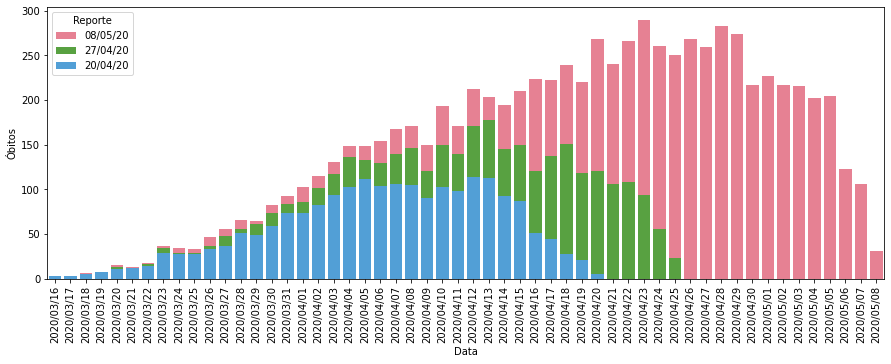

In [22]:
plt.figure(figsize=(15, 5))

sns.barplot(data=dados, x='Data', y='Óbitos', hue='Reporte', dodge=False, palette='husl')
plt.xticks(rotation=90)

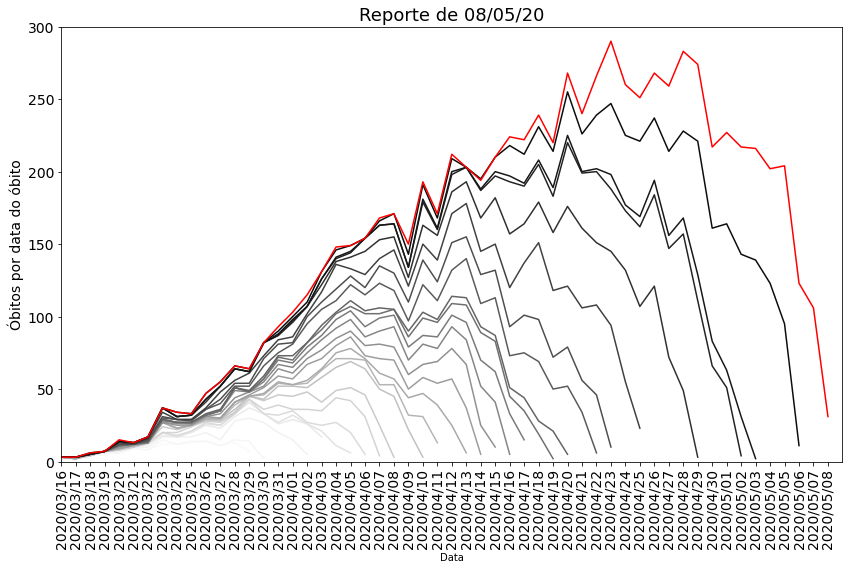

In [25]:
plt.close('all')
fig, ax = plt.subplots(figsize=(14, 8))
plt.ylim(0, 300)
plt.xlim(0, 54)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)

def plot_obitos(idx):

  colunas = obitos_df.columns[::-1]
  dados   = pd.DataFrame(obitos_df[colunas[:idx]])  
  dados['Data'] = obitos_df['Data']

  # Plot do passado
  dados = dados.melt('Data', var_name='Reporte', value_name='Óbitos')
  sns.lineplot(data=dados, x='Data', y='Óbitos', hue='Reporte', ax=ax, palette='Greys', legend=False)
  
  # Plot do presente
  sns.lineplot(data=obitos_df, x='Data', y=obitos_df[colunas[idx]], ax=ax, color='red', legend=False)

  ax.set_title('Reporte de {0}'.format(colunas[idx]), fontsize=18)
  ax.set_ylabel('Óbitos por data do óbito', fontsize=14)
  

anim = animation.FuncAnimation(fig, plot_obitos, frames=25, interval=1000, blit=False)
HTML(anim.to_html5_video())